## Cargar Datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
# Load datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'
#print(df.head())

## Libere Graficos

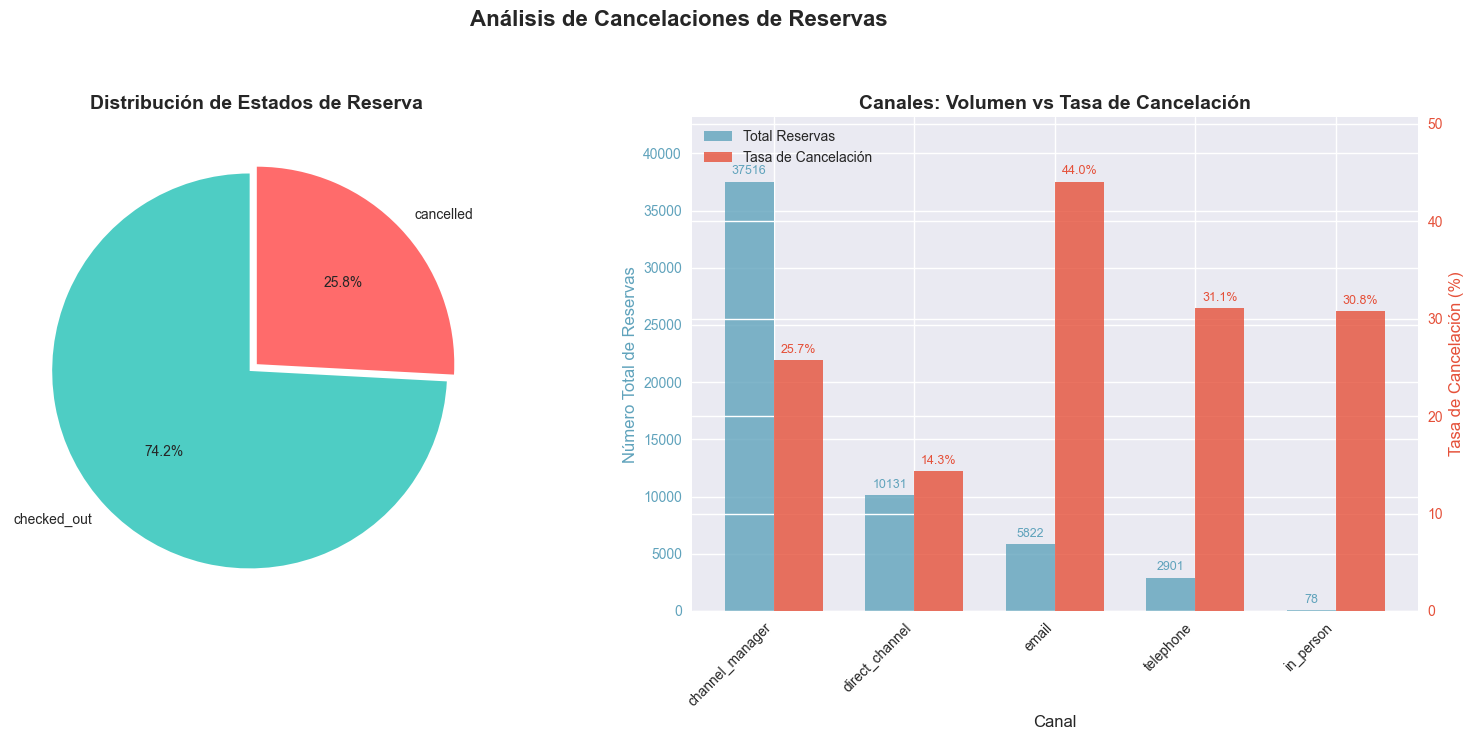


RESUMEN DE CANALES (Top 8 por volumen)
                 Total Reservas  Tasa Cancelación (%)  % del Total
origin                                                            
channel_manager           37516                  25.7         66.5
direct_channel            10131                  14.3         17.9
email                      5822                  44.0         10.3
telephone                  2901                  31.1          5.1
in_person                    78                  30.8          0.1

Resumen general:
- Total de reservas analizadas: 56448
- Tasa general de cancelación: 25.8%
- Número de canales únicos: 5


In [28]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos', 'Originales')
filename = os.path.join(path_datos, 'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# ==============================================
# GRÁFICO 1: Pie chart de estados de reserva
# ==============================================
status_counts = df['status'].value_counts()
colors = ['#4ecdc4', '#ff6b6b']  # Verde para checked_out, Rojo para cancelled
axes[0].pie(status_counts.values, labels=status_counts.index, 
            autopct='%1.1f%%', colors=colors, startangle=90, explode=[0.05, 0])
axes[0].set_title('Distribución de Estados de Reserva', fontsize=14, fontweight='bold')

# ==============================================
# GRÁFICO 2: Canales - Volumen vs Tasa de Cancelación
# ==============================================
if 'origin' in df.columns:
    # Obtener los top 8 canales por volumen
    top_channels = df['origin'].value_counts().head(8).index.tolist()
    
    # Filtrar datos solo para los canales top
    df_top = df[df['origin'].isin(top_channels)]
    
    # Calcular métricas por canal
    channel_stats = pd.DataFrame({
        'total_reservations': df_top['origin'].value_counts(),
        'cancellation_rate': df_top.groupby('origin')['is_cancelled'].mean() * 100
    }).reindex(top_channels)  # Ordenar según el volumen
    
    # Crear el gráfico de barras agrupadas
    x = range(len(channel_stats))
    width = 0.35
    
    # Barras para volumen de reservas (eje izquierdo)
    ax1 = axes[1]
    bars1 = ax1.bar([i - width/2 for i in x], channel_stats['total_reservations'], 
                   width, label='Total Reservas', color='#60a3bc', alpha=0.8)
    ax1.set_xlabel('Canal', fontsize=12)
    ax1.set_ylabel('Número Total de Reservas', fontsize=12, color='#60a3bc')
    ax1.tick_params(axis='y', labelcolor='#60a3bc')
    ax1.set_xticks(x)
    ax1.set_xticklabels(channel_stats.index, rotation=45, ha='right', fontsize=10)
    
    # Crear segundo eje Y para tasa de cancelación
    ax2 = ax1.twinx()
    bars2 = ax2.bar([i + width/2 for i in x], channel_stats['cancellation_rate'], 
                   width, label='Tasa de Cancelación', color='#e55039', alpha=0.8)
    ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=12, color='#e55039')
    ax2.tick_params(axis='y', labelcolor='#e55039')
    
    # Añadir valores en las barras
    for i, (v1, v2) in enumerate(zip(channel_stats['total_reservations'], 
                                     channel_stats['cancellation_rate'])):
        # Valor en barras de volumen
        ax1.text(i - width/2, v1 + max(channel_stats['total_reservations'])*0.01, 
                str(int(v1)), ha='center', va='bottom', fontsize=9, color='#60a3bc')
        # Valor en barras de tasa de cancelación
        ax2.text(i + width/2, v2 + max(channel_stats['cancellation_rate'])*0.01, 
                f'{v2:.1f}%', ha='center', va='bottom', fontsize=9, color='#e55039')
    
    # Combinar leyendas
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    ax1.set_title('Canales: Volumen vs Tasa de Cancelación', fontsize=14, fontweight='bold')
    
    # Ajustar límites del eje Y para mejor visualización
    ax1.set_ylim([0, max(channel_stats['total_reservations']) * 1.15])
    ax2.set_ylim([0, max(channel_stats['cancellation_rate']) * 1.15])
    
else:
    # Si no existe la columna 'origin'
    axes[1].text(0.5, 0.5, 'Columna "origin" no encontrada\nen los datos', 
                ha='center', va='center', fontsize=12, transform=axes[1].transAxes)
    axes[1].set_title('Canales: Volumen vs Tasa de Cancelación', fontsize=14, fontweight='bold')

# Ajustar layout
plt.suptitle('Análisis de Cancelaciones de Reservas', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# ==============================================
# TABLA ADICIONAL: Datos de los canales
# ==============================================
if 'origin' in df.columns:
    print("\n" + "="*60)
    print("RESUMEN DE CANALES (Top 8 por volumen)")
    print("="*60)
    
    channel_summary = pd.DataFrame({
        'Total Reservas': channel_stats['total_reservations'].astype(int),
        'Tasa Cancelación (%)': channel_stats['cancellation_rate'].round(1),
        '% del Total': (channel_stats['total_reservations'] / len(df) * 100).round(1)
    })
    
    print(channel_summary)
    print("\nResumen general:")
    print(f"- Total de reservas analizadas: {len(df)}")
    print(f"- Tasa general de cancelación: {(df['is_cancelled'].sum() / len(df) * 100):.1f}%")
    print(f"- Número de canales únicos: {df['origin'].nunique()}")

ESTADÍSTICAS DE RAZONES DE CANCELACIÓN
Total de cancelaciones: 14588
Cancelaciones con 'refuse_to_detail': 9040 (62.0%)
Cancelaciones analizadas (sin 'refuse_to_detail'): 5548

Distribución de razones (excluyendo 'refuse_to_detail'):
  • series_group_cancelled: 1417 (25.5%)
  • payment_missed: 1395 (25.1%)
  • no_show: 732 (13.2%)
  • changed_plans: 664 (12.0%)
  • other: 575 (10.4%)
  • duplicated: 142 (2.6%)
  • technical_error: 127 (2.3%)
  • force_majeure: 115 (2.1%)
  • mistake: 100 (1.8%)
  • found_better_location: 84 (1.5%)


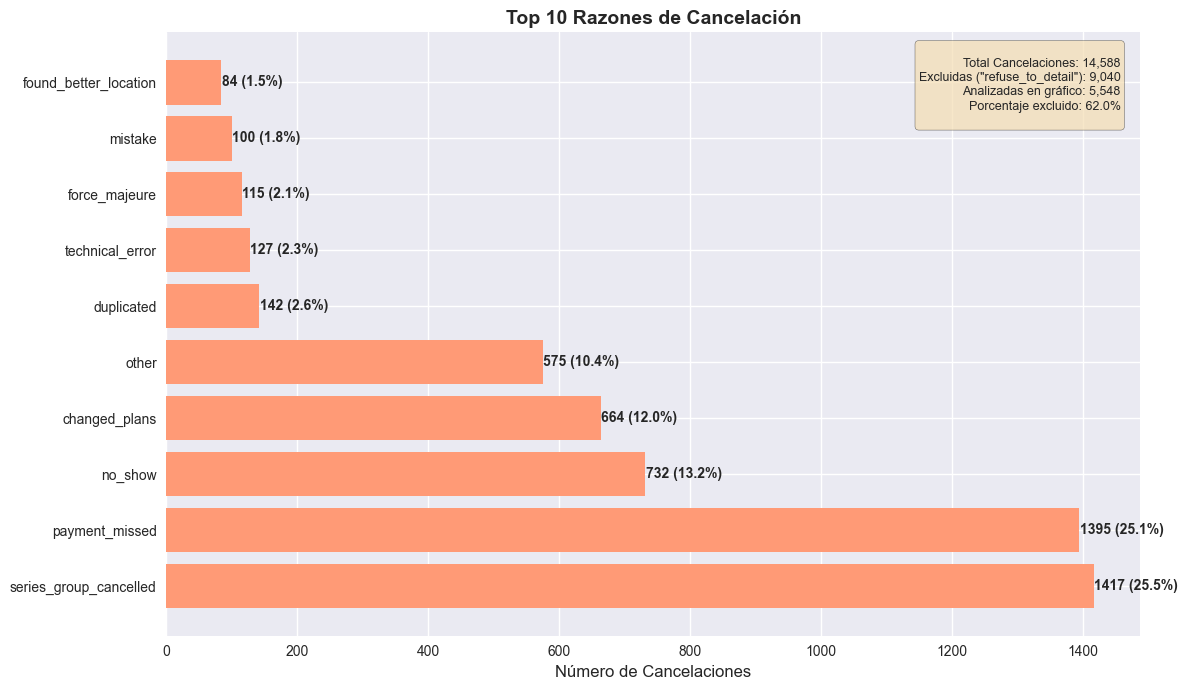

In [ ]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Filtrar solo cancelaciones
cancelled_df = df[df['is_cancelled'] == True]

# GRÁFICO 2: Razones de Cancelación (excluyendo refuse_to_detail)
plt.figure(figsize=(12, 7))

if 'cancellation_reason' in cancelled_df.columns and not cancelled_df.empty:
    # Excluir 'refuse_to_detail' del análisis
    cancelled_filtered = cancelled_df[cancelled_df['cancellation_reason'] != 'refuse_to_detail']
    
    if not cancelled_filtered.empty:
        # Contar razones (excluyendo refuse_to_detail)
        reason_counts = cancelled_filtered['cancellation_reason'].value_counts()
        
        # Tomar top 10 (o menos si hay menos razones)
        top_n = min(10, len(reason_counts))
        reason_counts = reason_counts.head(top_n)
        
        # Crear gráfico de barras horizontales
        bars = plt.barh(range(len(reason_counts)), reason_counts.values, color='#ff9a76')
        plt.yticks(range(len(reason_counts)), reason_counts.index)
        plt.xlabel('Número de Cancelaciones', fontsize=12)
        plt.title(f'Top {top_n} Razones de Cancelación', 
                  fontsize=14, fontweight='bold')
        
        # Añadir valores en las barras
        for i, (bar, count) in enumerate(zip(bars, reason_counts.values)):
            percentage = (count / len(cancelled_filtered)) * 100
            plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{count} ({percentage:.1f}%)',
                    va='center', fontsize=10, fontweight='bold')
        
        # Estadísticas - MOVIDO A LA DERECHA
        total_cancelled = len(cancelled_df)
        total_refused = (cancelled_df['cancellation_reason'] == 'refuse_to_detail').sum()
        total_filtered = len(cancelled_filtered)
        
        stats_text = f'''
Total Cancelaciones: {total_cancelled:,}
Excluidas ("refuse_to_detail"): {total_refused:,}
Analizadas en gráfico: {total_filtered:,}
Porcentaje excluido: {(total_refused/total_cancelled*100):.1f}%
        '''
        
        # Mover a la parte derecha superior (coordenadas 0.98, 0.98 significa 98% a la derecha, 98% arriba)
        plt.text(0.98, 0.98, stats_text,
                 transform=plt.gca().transAxes, fontsize=9,
                 verticalalignment='top',
                 horizontalalignment='right',  # Alineado a la derecha
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
        
        # También mostrar en consola
        print("="*60)
        print("ESTADÍSTICAS DE RAZONES DE CANCELACIÓN")
        print("="*60)
        print(f"Total de cancelaciones: {total_cancelled}")
        print(f"Cancelaciones con 'refuse_to_detail': {total_refused} ({(total_refused/total_cancelled*100):.1f}%)")
        print(f"Cancelaciones analizadas (sin 'refuse_to_detail'): {total_filtered}")
        print("\nDistribución de razones (excluyendo 'refuse_to_detail'):")
        for reason, count in reason_counts.items():
            percentage = (count / total_filtered) * 100
            print(f"  • {reason}: {count} ({percentage:.1f}%)")
    
    else:
        print("⚠️ No hay datos de razones de cancelación después de excluir 'refuse_to_detail'")
        
        # Mostrar distribución original para referencia
        if 'cancellation_reason' in cancelled_df.columns:
            print("\nDistribución original (incluyendo 'refuse_to_detail'):")
            original_counts = cancelled_df['cancellation_reason'].value_counts()
            for reason, count in original_counts.head(10).items():
                percentage = (count / len(cancelled_df)) * 100
                print(f"  • {reason}: {count} ({percentage:.1f}%)")
            
            # Crear gráfico con todas las razones (incluyendo refuse_to_detail)
            original_counts_top = original_counts.head(10)
            bars = plt.barh(range(len(original_counts_top)), original_counts_top.values, color='#ff9a76')
            plt.yticks(range(len(original_counts_top)), original_counts_top.index)
            plt.xlabel('Número de Cancelaciones', fontsize=12)
            plt.title('Top 10 Razones de Cancelación (todas)', fontsize=14, fontweight='bold')
            
            for i, (bar, count) in enumerate(zip(bars, original_counts_top.values)):
                percentage = (count / len(cancelled_df)) * 100
                plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                        f'{count} ({percentage:.1f}%)',
                        va='center', fontsize=10)
            
            # Marcar refuse_to_detail en rojo si está presente
            if 'refuse_to_detail' in original_counts_top.index:
                idx = list(original_counts_top.index).index('refuse_to_detail')
                bars[idx].set_color('#ff0000')
                bars[idx].set_alpha(0.8)
                
                # Texto movido a la derecha
                plt.text(0.98, 0.98, "⚠️ 'refuse_to_detail' marcado en rojo",
                         transform=plt.gca().transAxes, fontsize=10,
                         verticalalignment='top',
                         horizontalalignment='right',
                         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
else:
    print("⚠️ No hay datos de razones de cancelación disponibles")

plt.tight_layout()
plt.show()

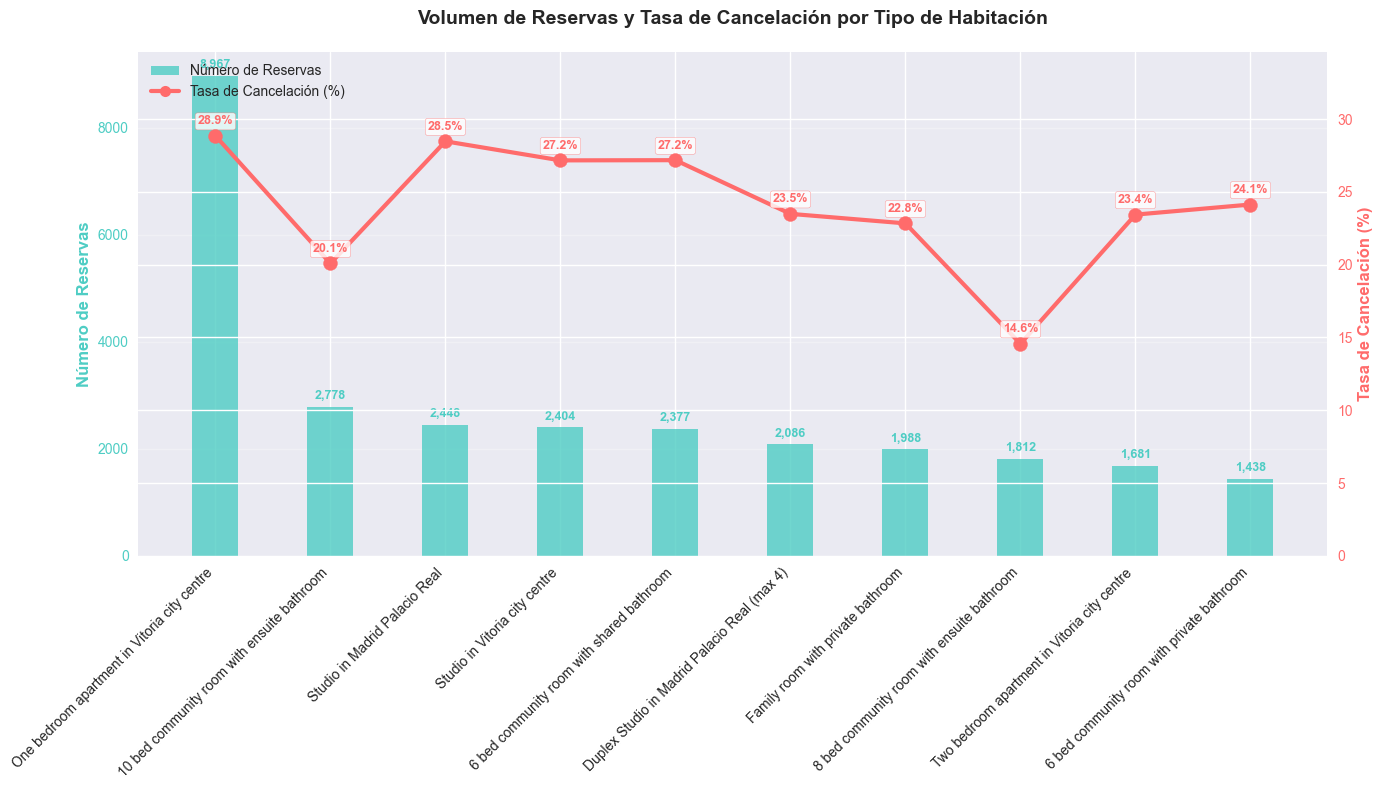

In [20]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir ADR a numérico
df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

# Crear figura con un solo gráfico
fig, ax = plt.subplots(figsize=(14, 8))

if 'requested_category_name' in df.columns:
    # Obtener los 10 tipos de habitación más reservados
    room_counts = df['requested_category_name'].value_counts().head(10)
    
    # Calcular tasa de cancelación para los mismos tipos (ordenados por volumen)
    cancel_by_room = df.groupby('requested_category_name')['is_cancelled'].mean() * 100
    
    # Asegurarnos de usar los mismos tipos ordenados por volumen de reservas
    cancel_by_room = cancel_by_room.loc[room_counts.index]
    
    # Crear gráfico de barras combinadas con eje secundario
    x = np.arange(len(room_counts))
    
    # Crear eje secundario
    ax2 = ax.twinx()
    
    # Barras de volumen (eje izquierdo)
    bars1 = ax.bar(x, room_counts.values, width=0.4, color='#4ecdc4', 
                   alpha=0.8, label='Número de Reservas', align='center')
    
    # Línea de tasa de cancelación (eje derecho)
    line1 = ax2.plot(x, cancel_by_room.values, color='#ff6b6b', 
                    linewidth=3, marker='o', markersize=8, 
                    label='Tasa de Cancelación (%)')
    
    # Puntos de la línea
    scatter = ax2.scatter(x, cancel_by_room.values, color='#ff6b6b', 
                         s=100, zorder=5)
    
    # Configurar ejes X
    ax.set_xticks(x)
    ax.set_xticklabels(room_counts.index, rotation=45, ha='right', fontsize=10)
    
    # Configurar eje Y izquierdo (volumen)
    ax.set_ylabel('Número de Reservas', fontsize=12, color='#4ecdc4', fontweight='bold')
    ax.tick_params(axis='y', labelcolor='#4ecdc4')
    
    # Configurar eje Y derecho (cancelación)
    ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=12, color='#ff6b6b', fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#ff6b6b')
    
    # Añadir valores en las barras
    for i, (bar, count) in enumerate(zip(bars1, room_counts.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + room_counts.max()*0.01,
               f'{count:,}', ha='center', va='bottom', fontsize=9, 
               color='#4ecdc4', fontweight='bold')
    
    # Añadir valores en los puntos de cancelación
    for i, rate in enumerate(cancel_by_room.values):
        ax2.text(i, rate + cancel_by_room.max()*0.02, f'{rate:.1f}%', 
                ha='center', va='bottom', fontsize=9, color='#ff6b6b', 
                fontweight='bold', bbox=dict(boxstyle='round,pad=0.2', 
                facecolor='white', alpha=0.8, edgecolor='#ff6b6b'))
    
    # Leyenda combinada
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    # Título
    ax.set_title('Volumen de Reservas y Tasa de Cancelación por Tipo de Habitación', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Grid
    ax.grid(True, alpha=0.3, axis='y')
    
    # Ajustar límites del eje Y derecho para mejor visualización
    ax2.set_ylim([0, cancel_by_room.max() * 1.2])
    
else:
    # Si no existe la columna 'requested_category_name', mostrar mensaje
    ax.text(0.5, 0.5, 'ERROR: Columna "requested_category_name" no encontrada\nen los datos', 
            ha='center', va='center', fontsize=12, transform=ax.transAxes,
            fontweight='bold', bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
    ax.set_title('GRÁFICO NO DISPONIBLE', fontsize=14, fontweight='bold', color='red')

# Ajustar layout
plt.tight_layout()
plt.show()

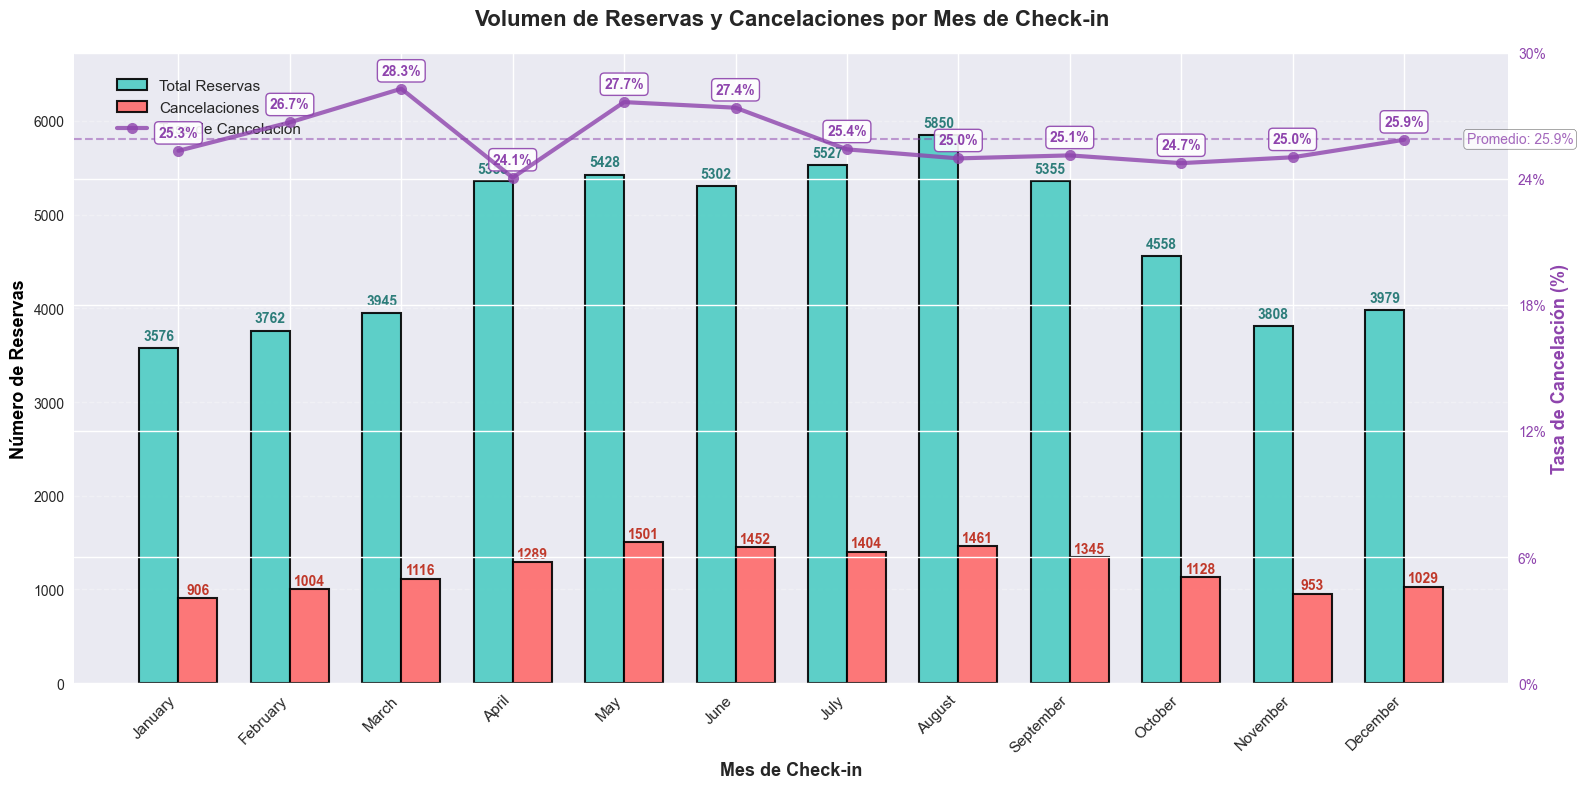


RESUMEN: VOLUMEN DE RESERVAS Y CANCELACIONES POR MES
                    Total Reservas  Cancelaciones  Completadas  Tasa Cancelación (%)  Tasa Completadas (%)
checkin_month_name                                                                                        
January                       3576            906         2670                  25.3                  74.7
February                      3762           1004         2758                  26.7                  73.3
March                         3945           1116         2829                  28.3                  71.7
April                         5358           1289         4069                  24.1                  75.9
May                           5428           1501         3927                  27.7                  72.3
June                          5302           1452         3850                  27.4                  72.6
July                          5527           1404         4123                  25.4      

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos', 'Originales')
filename = os.path.join(path_datos, 'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir checkin_time a datetime y extraer mes
df['checkin_time'] = pd.to_datetime(df['checkin_time'], format='%b %d, %Y, %H:%M')
df['checkin_month'] = df['checkin_time'].dt.month
df['checkin_month_name'] = df['checkin_time'].dt.month_name()

# Calcular estadísticas por mes
cancel_by_month = df.groupby('checkin_month_name')['is_cancelled'].agg(['sum', 'count'])
cancel_by_month['cancellation_rate'] = (cancel_by_month['sum'] / cancel_by_month['count']) * 100

# Ordenar por mes cronológicamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
cancel_by_month = cancel_by_month.reindex(month_order)

# Filtrar solo meses con datos
cancel_by_month = cancel_by_month.dropna()

# Crear figura
fig, ax1 = plt.subplots(figsize=(16, 8))

# Posiciones para las barras
x_pos = range(len(cancel_by_month))
width = 0.35

# Crear barras agrupadas en el eje primario (ax1)
bars_total = ax1.bar([p - width/2 for p in x_pos], cancel_by_month['count'], 
                     width, label='Total Reservas', color='#4ecdc4', alpha=0.9, 
                     edgecolor='black', linewidth=1.5)

bars_cancelled = ax1.bar([p + width/2 for p in x_pos], cancel_by_month['sum'], 
                         width, label='Cancelaciones', color='#ff6b6b', alpha=0.9, 
                         edgecolor='black', linewidth=1.5)

# Configurar el gráfico - EJE PRIMARIO (ax1)
ax1.set_xlabel('Mes de Check-in', fontsize=13, fontweight='bold')
ax1.set_ylabel('Número de Reservas', fontsize=13, fontweight='bold', color='black')
ax1.set_title('Volumen de Reservas y Cancelaciones por Mes de Check-in', 
              fontsize=16, fontweight='bold', pad=20)

# Configurar eje X
ax1.set_xticks(x_pos)
ax1.set_xticklabels(cancel_by_month.index, rotation=45, ha='right', fontsize=11)

# Añadir valores en las barras
for i, (bar_total, bar_cancelled) in enumerate(zip(bars_total, bars_cancelled)):
    # Valor en barras de total
    height_total = bar_total.get_height()
    ax1.text(bar_total.get_x() + bar_total.get_width()/2., height_total + max(cancel_by_month['count'])*0.01,
             f'{int(height_total)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#2d7d7a')
    
    # Valor en barras de cancelaciones
    height_cancelled = bar_cancelled.get_height()
    ax1.text(bar_cancelled.get_x() + bar_cancelled.get_width()/2., height_cancelled + max(cancel_by_month['sum'])*0.01,
             f'{int(height_cancelled)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#c0392b')

# ==============================================
# AÑADIR LÍNEA MORADA CON TASA DE CANCELACIÓN - EJE SECUNDARIO
# ==============================================
# Crear eje secundario para la tasa de cancelación
ax2 = ax1.twinx()

# Añadir línea morada para tasa de cancelación
line_rate, = ax2.plot(x_pos, cancel_by_month['cancellation_rate'], 
                      marker='o', linewidth=3, markersize=8, color='#8e44ad', 
                      label='Tasa de Cancelación', alpha=0.8, zorder=5)

# Configurar eje secundario - ESCALA CORRECTA PARA PORCENTAJES
max_tasa = max(cancel_by_month['cancellation_rate'])
# Crear una escala apropiada para porcentajes (0-100%)
tasa_max_rounded = min(100, np.ceil(max_tasa / 10) * 10)  # Redondear al múltiplo de 10 más cercano, máximo 100%
ax2.set_ylim(0, tasa_max_rounded)
ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=13, fontweight='bold', color='#8e44ad')

# Configurar los ticks del eje derecho como porcentajes
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.tick_params(axis='y', labelcolor='#8e44ad')

# Asegurar que haya ticks razonables en el eje derecho
ax2.yaxis.set_major_locator(plt.MultipleLocator(max(5, tasa_max_rounded/5)))  # Al menos 5 ticks

# Añadir etiquetas de valores para la línea morada
for i, (mes, tasa) in enumerate(zip(cancel_by_month.index, cancel_by_month['cancellation_rate'])):
    ax2.annotate(f'{tasa:.1f}%', 
                 xy=(i, tasa), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center', 
                 fontsize=10,
                 fontweight='bold',
                 color='#8e44ad',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9, 
                          edgecolor='#8e44ad', linewidth=1))

# ==============================================
# COMBINAR LEYENDAS Y FINALIZAR GRÁFICO
# ==============================================
# Combinar leyendas de ambos ejes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, 
           framealpha=0.9, bbox_to_anchor=(0.02, 0.98))

# Añadir grid solo en el eje Y primario
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')

# Ajustar límites del eje Y principal
ax1.set_ylim([0, max(cancel_by_month['count']) * 1.15])

# Añadir línea horizontal para la tasa promedio
tasa_promedio = cancel_by_month['cancellation_rate'].mean()
ax2.axhline(y=tasa_promedio, color='#8e44ad', linestyle='--', alpha=0.5, linewidth=1.5)
ax2.annotate(f'Promedio: {tasa_promedio:.1f}%', 
             xy=(len(cancel_by_month)-0.5, tasa_promedio), 
             xytext=(5, 0), 
             textcoords='offset points',
             ha='left', 
             va='center',
             fontsize=10,
             color='#8e44ad',
             alpha=0.8,
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Ajustar layout
plt.tight_layout()
plt.show()

# ==============================================
# TABLA RESUMEN
# ==============================================
print("\n" + "="*80)
print("RESUMEN: VOLUMEN DE RESERVAS Y CANCELACIONES POR MES")
print("="*80)

# Crear tabla con información completa
summary_table = pd.DataFrame({
    'Total Reservas': cancel_by_month['count'].astype(int),
    'Cancelaciones': cancel_by_month['sum'].astype(int),
    'Completadas': (cancel_by_month['count'] - cancel_by_month['sum']).astype(int),
    'Tasa Cancelación (%)': cancel_by_month['cancellation_rate'].round(1),
    'Tasa Completadas (%)': (100 - cancel_by_month['cancellation_rate']).round(1)
})

print(summary_table.to_string())

print("\n" + "-"*80)
print("ANÁLISIS DESTACADO:")
print("-"*80)

# Calcular métricas clave
total_reservas = cancel_by_month['count'].sum()
total_cancelaciones = cancel_by_month['sum'].sum()
tasa_general = (total_cancelaciones / total_reservas) * 100

# Encontrar extremos
mes_max_reservas = cancel_by_month['count'].idxmax()
mes_min_reservas = cancel_by_month['count'].idxmin()
mes_max_cancel = cancel_by_month['sum'].idxmax()
mes_min_cancel = cancel_by_month['sum'].idxmin()
mes_max_tasa = cancel_by_month['cancellation_rate'].idxmax()
mes_min_tasa = cancel_by_month['cancellation_rate'].idxmin()

print(f"📈 MES CON MÁS ACTIVIDAD:")
print(f"   • Reservas: {mes_max_reservas} ({cancel_by_month['count'].max():.0f} reservas)")
print(f"   • Cancelaciones: {mes_max_cancel} ({cancel_by_month['sum'].max():.0f} cancelaciones)")
print(f"   • Tasa más alta: {mes_max_tasa} ({cancel_by_month['cancellation_rate'].max():.1f}%)\n")

print(f"📉 MES CON MENOS ACTIVIDAD:")
print(f"   • Reservas: {mes_min_reservas} ({cancel_by_month['count'].min():.0f} reservas)")
print(f"   • Cancelaciones: {mes_min_cancel} ({cancel_by_month['sum'].min():.0f} cancelaciones)")
print(f"   • Tasa más baja: {mes_min_tasa} ({cancel_by_month['cancellation_rate'].min():.1f}%)\n")

print("📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total reservas: {total_reservas:,}")
print(f"   • Total cancelaciones: {total_cancelaciones:,}")
print(f"   • Tasa general de cancelación: {tasa_general:.1f}%")
print(f"   • Tasa promedio mensual: {cancel_by_month['cancellation_rate'].mean():.1f}%")
print(f"   • Rango de tasas: {cancel_by_month['cancellation_rate'].min():.1f}% - {cancel_by_month['cancellation_rate'].max():.1f}%")
print(f"   • Meses analizados: {len(cancel_by_month)}")

# Calcular ratio cancelaciones/reservas por mes
print("\n📋 RATIO CANCELACIONES/RESERVAS POR MES:")
print("-"*80)
for mes in cancel_by_month.index:
    total = int(cancel_by_month.loc[mes, 'count'])
    cancel = int(cancel_by_month.loc[mes, 'sum'])
    ratio = cancel / total if total > 0 else 0
    if cancel > 0:
        ratio_inv = 1/ratio if ratio > 0 else float('inf')
        print(f"   {mes}: {cancel}/{total} = {ratio:.2f} (1 cancelación cada {ratio_inv:.1f} reservas)")
    else:
        print(f"   {mes}: {cancel}/{total} = {ratio:.2f} (sin cancelaciones)")

C:\Users\Umiak\AppData\Local\Temp\ipykernel_19644\1139427489.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


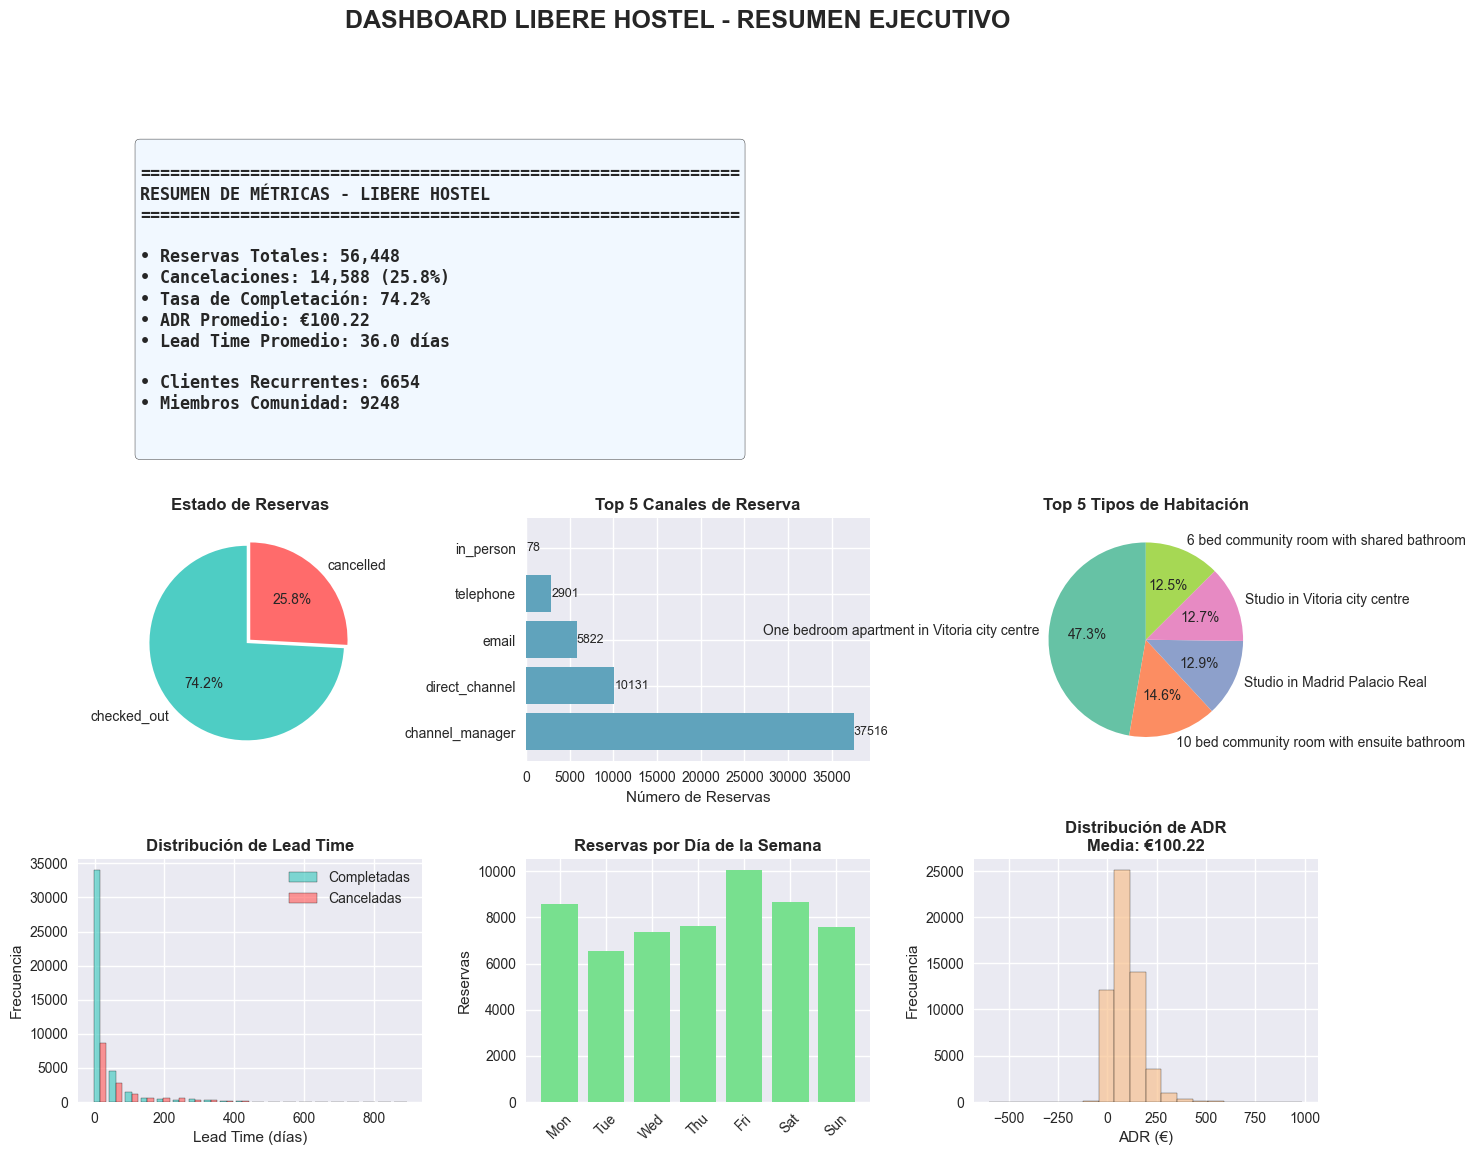

INFORMACIÓN ADICIONAL DEL DATASET
Columnas disponibles: ['booked_at', 'checkin_time', 'checkout_time', 'lead_time', 'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count', 'child_count', 'origin', 'travel_agency_name', 'requested_category', 'requested_category_name', 'asset', 'asset_type', 'brand', 'asset_opening_date', 'available_units', 'business_segment', 'rate', 'rate_group_name', 'rate_type', 'completed_entry_forms_count', 'all_entry_forms_completed', 'last_entry_form_completed_at', 'returning_inhabitant', 'recurrence', 'libere_community', 'bought_products', 'product_count', 'reservation_net_value', 'total_adr', 'status', 'cancelled_at', 'cancellation_reason', 'cancellation_lead_time', 'is_cancelled', 'lead_time_numeric']
Tipos de datos:
booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    objec

In [ ]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir columnas numéricas si existen
if 'total_adr' in df.columns:
    df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

if 'lead_time' in df.columns:
    df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')

# GRÁFICO 6: Dashboard Resumen
fig = plt.figure(figsize=(16, 12))
fig.suptitle('DASHBOARD LIBERE HOSTEL - RESUMEN EJECUTIVO', 
             fontsize=18, fontweight='bold', y=1.02)

# Layout usando GridSpec
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# ========== PANEL SUPERIOR: MÉTRICAS CLAVE ==========
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')

# Calcular métricas
total_reservas = len(df)
cancelaciones = df['is_cancelled'].sum()
tasa_cancelacion = (cancelaciones / total_reservas) * 100
tasa_completacion = 100 - tasa_cancelacion

# ADR promedio - manejar posibles valores no numéricos
if 'total_adr' in df.columns:
    # Filtrar solo valores numéricos válidos
    adr_valores = pd.to_numeric(df['total_adr'], errors='coerce')
    adr_promedio = adr_valores.mean()
    if pd.isna(adr_promedio):
        adr_promedio = 0
        adr_texto = "€0.00 (datos no disponibles)"
    else:
        adr_texto = f"€{adr_promedio:.2f}"
else:
    adr_promedio = 0
    adr_texto = "€0.00 (columna no encontrada)"

# Lead time promedio - manejar posibles valores no numéricos
if 'lead_time' in df.columns:
    lead_valores = pd.to_numeric(df['lead_time'], errors='coerce')
    lead_promedio = lead_valores.mean()
    if pd.isna(lead_promedio):
        lead_promedio = 0
        lead_texto = "0.0 días (datos no disponibles)"
    else:
        lead_texto = f"{lead_promedio:.1f} días"
else:
    lead_promedio = 0
    lead_texto = "0.0 días (columna no encontrada)"

# Crear texto con métricas
metricas_texto = f'''
{'='*60}
RESUMEN DE MÉTRICAS - LIBERE HOSTEL
{'='*60}

• Reservas Totales: {total_reservas:,}
• Cancelaciones: {cancelaciones:,} ({tasa_cancelacion:.1f}%)
• Tasa de Completación: {tasa_completacion:.1f}%
• ADR Promedio: {adr_texto}
• Lead Time Promedio: {lead_texto}

• Clientes Recurrentes: {df['returning_inhabitant'].eq('yes').sum() if 'returning_inhabitant' in df.columns else 'N/A'}
• Miembros Comunidad: {df['libere_community'].eq('yes').sum() if 'libere_community' in df.columns else 'N/A'}

'''

ax1.text(0.05, 0.5, metricas_texto, fontsize=12, fontfamily='monospace',
         verticalalignment='center', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#f0f8ff', alpha=0.9))

# ========== PANEL IZQUIERDO: DISTRIBUCIONES ==========
ax2 = fig.add_subplot(gs[1, 0])
# Distribución de estados
status_counts = df['status'].value_counts()
colors = ['#4ecdc4', '#ff6b6b']
ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.05, 0])
ax2.set_title('Estado de Reservas', fontsize=12, fontweight='bold')

# ========== PANEL CENTRAL: CANALES ==========
ax3 = fig.add_subplot(gs[1, 1])
if 'origin' in df.columns:
    top_channels = df['origin'].value_counts().head(5)
    ax3.barh(range(len(top_channels)), top_channels.values, color='#60a3bc')
    ax3.set_yticks(range(len(top_channels)))
    ax3.set_yticklabels(top_channels.index)
    ax3.set_xlabel('Número de Reservas')
    ax3.set_title('Top 5 Canales de Reserva', fontsize=12, fontweight='bold')
    
    for i, v in enumerate(top_channels.values):
        ax3.text(v + 0.5, i, str(v), va='center', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'Datos de origen\nno disponibles', 
             ha='center', va='center', transform=ax3.transAxes,
             fontsize=10, fontweight='bold')
    ax3.set_title('Canales de Reserva', fontsize=12, fontweight='bold')
    ax3.axis('off')

# ========== PANEL DERECHO: HABITACIONES ==========
ax4 = fig.add_subplot(gs[1, 2])
if 'requested_category_name' in df.columns:
    top_rooms = df['requested_category_name'].value_counts().head(5)
    colors_rooms = sns.color_palette("Set2", len(top_rooms))
    ax4.pie(top_rooms.values, labels=top_rooms.index, autopct='%1.1f%%',
            colors=colors_rooms, startangle=90)
    ax4.set_title('Top 5 Tipos de Habitación', fontsize=12, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'Datos de habitaciones\nno disponibles', 
             ha='center', va='center', transform=ax4.transAxes,
             fontsize=10, fontweight='bold')
    ax4.set_title('Tipos de Habitación', fontsize=12, fontweight='bold')
    ax4.axis('off')

# ========== PANEL INFERIOR IZQUIERDO: LEAD TIME ==========
ax5 = fig.add_subplot(gs[2, 0])
if 'lead_time' in df.columns:
    # Convertir a numérico y manejar valores faltantes
    df['lead_time_numeric'] = pd.to_numeric(df['lead_time'], errors='coerce')
    
    lead_cancel = df[df['is_cancelled']]['lead_time_numeric'].dropna()
    lead_complete = df[~df['is_cancelled']]['lead_time_numeric'].dropna()
    
    if len(lead_cancel) > 0 and len(lead_complete) > 0:
        ax5.hist([lead_complete, lead_cancel], bins=20, 
                 label=['Completadas', 'Canceladas'],
                 color=['#4ecdc4', '#ff6b6b'], alpha=0.7, edgecolor='black')
        ax5.set_xlabel('Lead Time (días)')
        ax5.set_ylabel('Frecuencia')
        ax5.set_title('Distribución de Lead Time', fontsize=12, fontweight='bold')
        ax5.legend()
    else:
        ax5.text(0.5, 0.5, 'Datos insuficientes\npara Lead Time', 
                 ha='center', va='center', transform=ax5.transAxes,
                 fontsize=10, fontweight='bold')
        ax5.set_title('Lead Time', fontsize=12, fontweight='bold')
        ax5.axis('off')
else:
    ax5.text(0.5, 0.5, 'Lead Time\nno disponible', 
             ha='center', va='center', transform=ax5.transAxes,
             fontsize=10, fontweight='bold')
    ax5.set_title('Lead Time', fontsize=12, fontweight='bold')
    ax5.axis('off')

# ========== PANEL INFERIOR CENTRAL: TEMPORAL ==========
ax6 = fig.add_subplot(gs[2, 1])
if 'checkin_day' in df.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['checkin_day'].value_counts().reindex(day_order, fill_value=0)
    
    ax6.bar(range(len(day_counts)), day_counts.values, color='#78e08f')
    ax6.set_xticks(range(len(day_counts)))
    ax6.set_xticklabels([d[:3] for d in day_counts.index], rotation=45)
    ax6.set_ylabel('Reservas')
    ax6.set_title('Reservas por Día de la Semana', fontsize=12, fontweight='bold')
else:
    ax6.text(0.5, 0.5, 'Datos temporales\nno disponibles', 
             ha='center', va='center', transform=ax6.transAxes,
             fontsize=10, fontweight='bold')
    ax6.set_title('Distribución Temporal', fontsize=12, fontweight='bold')
    ax6.axis('off')

# ========== PANEL INFERIOR DERECHO: ADR ==========
ax7 = fig.add_subplot(gs[2, 2])
if 'total_adr' in df.columns:
    # Convertir a numérico
    adr_data = pd.to_numeric(df['total_adr'], errors='coerce').dropna()
    
    if len(adr_data) > 0:
        ax7.hist(adr_data, bins=20, color='#f8c291', edgecolor='black', alpha=0.7)
        ax7.set_xlabel('ADR (€)')
        ax7.set_ylabel('Frecuencia')
        media_adr = adr_data.mean()
        ax7.set_title(f'Distribución de ADR\nMedia: €{media_adr:.2f}', 
                     fontsize=12, fontweight='bold')
    else:
        ax7.text(0.5, 0.5, 'Datos de ADR\nno disponibles', 
                 ha='center', va='center', transform=ax7.transAxes,
                 fontsize=10, fontweight='bold')
        ax7.set_title('Distribución de ADR', fontsize=12, fontweight='bold')
        ax7.axis('off')
else:
    ax7.text(0.5, 0.5, 'ADR\nno disponible', 
             ha='center', va='center', transform=ax7.transAxes,
             fontsize=10, fontweight='bold')
    ax7.set_title('Distribución de ADR', fontsize=12, fontweight='bold')
    ax7.axis('off')

plt.tight_layout()
plt.show()

# Mostrar información adicional en consola
print("="*60)
print("INFORMACIÓN ADICIONAL DEL DATASET")
print("="*60)
print(f"Columnas disponibles: {df.columns.tolist()}")
print(f"Tipos de datos:")
print(df.dtypes)
print("\nValores únicos en columnas clave:")

columnas_clave = ['status', 'origin', 'business_segment', 'rate_type', 'requested_category_name']
for col in columnas_clave:
    if col in df.columns:
        print(f"- {col}: {df[col].nunique()} valores únicos")

if 'total_adr' in df.columns:
    print(f"\nEstadísticas de ADR:")
    print(f"  Valores no numéricos: {df['total_adr'].apply(lambda x: not str(x).replace('.', '', 1).isdigit() if pd.notna(x) else False).sum()}")
    print(f"  Valores nulos: {df['total_adr'].isna().sum()}")

## Graficos Generales

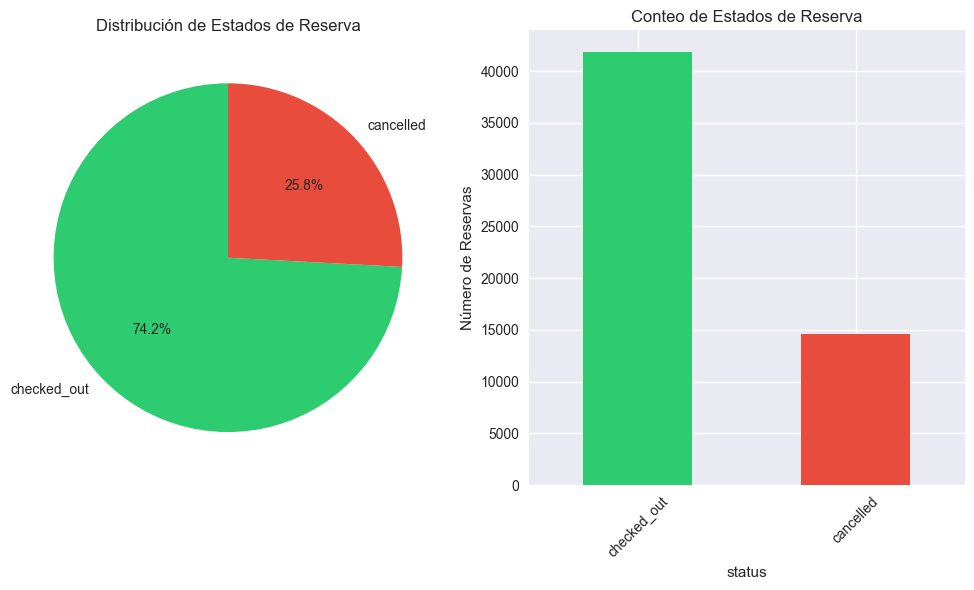

In [8]:
# Gráfico 1: Distribución de status
plt.figure(figsize=(10, 6))

status_counts = df['status'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Verde para checked_out, rojo para cancelled

plt.subplot(1, 2, 1)
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución de Estados de Reserva')

plt.subplot(1, 2, 2)
status_counts.plot(kind='bar', color=colors)
plt.title('Conteo de Estados de Reserva')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

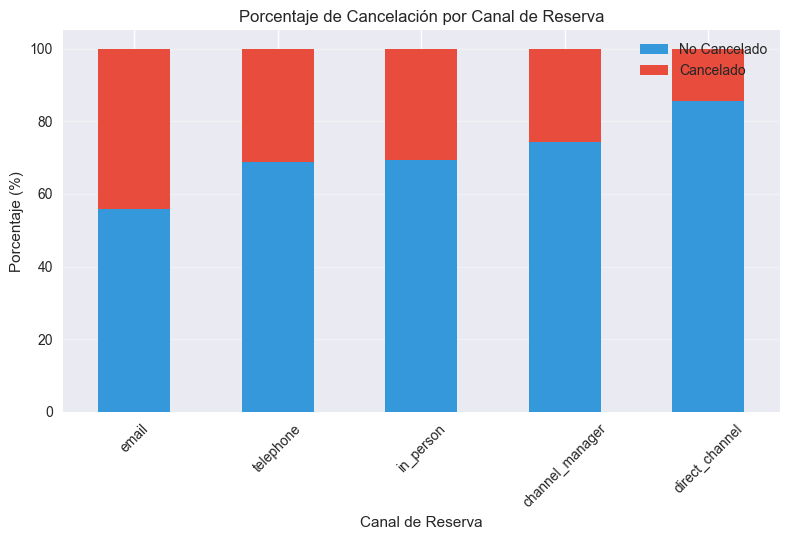


Tasas de cancelación por canal:
origin
email              44.039849
telephone          31.092727
in_person          30.769231
channel_manager    25.717027
direct_channel     14.312506
Name: True, dtype: float64


In [9]:
# Gráfico 2: Cancelación por canal
plt.figure(figsize=(12, 6))
cancel_by_origin = pd.crosstab(df['origin'], df['is_cancelled'], normalize='index') * 100

cancel_by_origin_sorted = cancel_by_origin.sort_values(by=True, ascending=False)
cancel_by_origin_sorted.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])

plt.title('Porcentaje de Cancelación por Canal de Reserva')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Canal de Reserva')
plt.legend(['No Cancelado', 'Cancelado'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar tasas específicas
print("\nTasas de cancelación por canal:")
print(cancel_by_origin[True].sort_values(ascending=False))

<Figure size 1200x600 with 0 Axes>

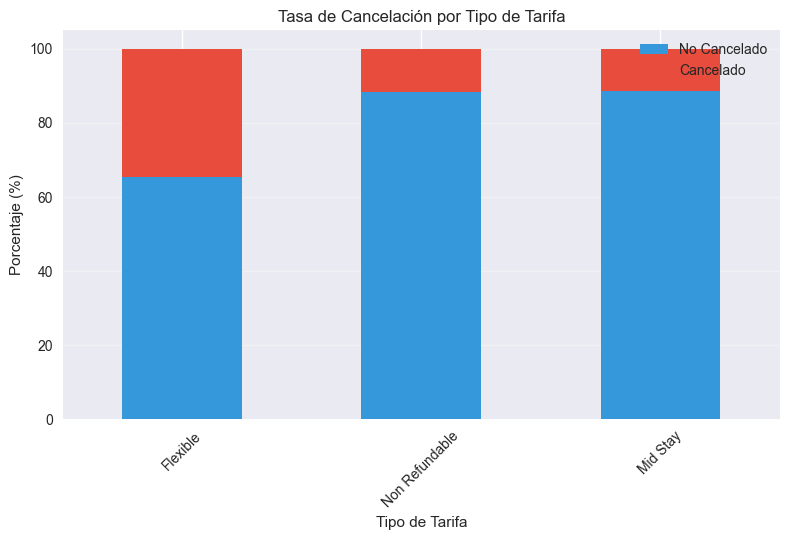

In [10]:
# Gráfico 3: Cancelación por tipo de tarifa
plt.figure(figsize=(12, 6))

cancel_by_rate = pd.crosstab(df['rate_type'], df['is_cancelled'], normalize='index') * 100
cancel_by_rate_sorted = cancel_by_rate.sort_values(by=True, ascending=False)

cancel_by_rate_sorted.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])
plt.title('Tasa de Cancelación por Tipo de Tarifa')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Tipo de Tarifa')
plt.legend(['No Cancelado', 'Cancelado'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

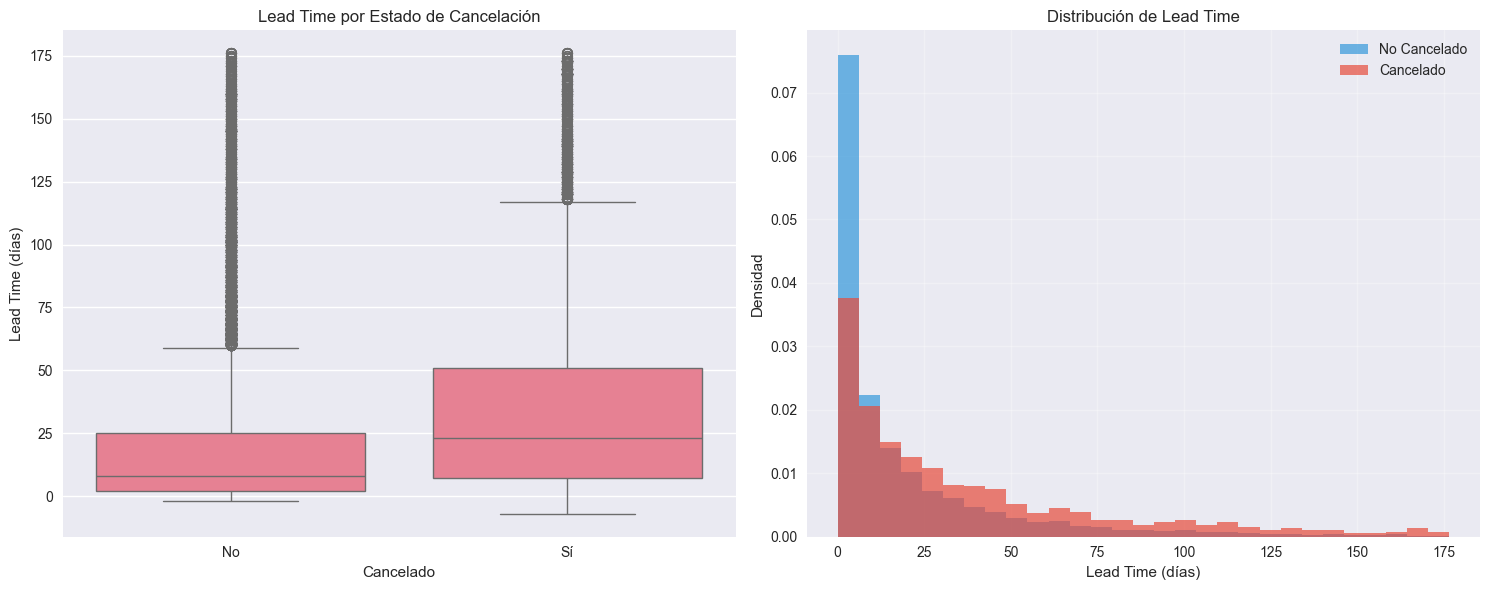

Lead time promedio - No cancelados: 27.5 días
Lead time promedio - Cancelados: 60.4 días


In [11]:
# Gráfico 4: Lead Time vs Cancelación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Boxplot
df_box = df[df['lead_time'] <= df['lead_time'].quantile(0.95)]  # Remover outliers extremos
sns.boxplot(x='is_cancelled', y='lead_time', data=df_box)
plt.title('Lead Time por Estado de Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Lead Time (días)')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
# Histograma comparativo
max_lead = min(df['lead_time'].quantile(0.95), 200)  # Limitar para mejor visualización
bins = np.linspace(0, max_lead, 30)

plt.hist(df[df['is_cancelled'] == False]['lead_time'], bins=bins, alpha=0.7, 
         label='No Cancelado', color='#3498db', density=True)
plt.hist(df[df['is_cancelled'] == True]['lead_time'], bins=bins, alpha=0.7, 
         label='Cancelado', color='#e74c3c', density=True)
plt.xlabel('Lead Time (días)')
plt.ylabel('Densidad')
plt.legend()
plt.title('Distribución de Lead Time')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
print(f"Lead time promedio - No cancelados: {df[df['is_cancelled'] == False]['lead_time'].mean():.1f} días")
print(f"Lead time promedio - Cancelados: {df[df['is_cancelled'] == True]['lead_time'].mean():.1f} días")

C:\Users\Umiak\AppData\Local\Temp\ipykernel_19644\4271756240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100


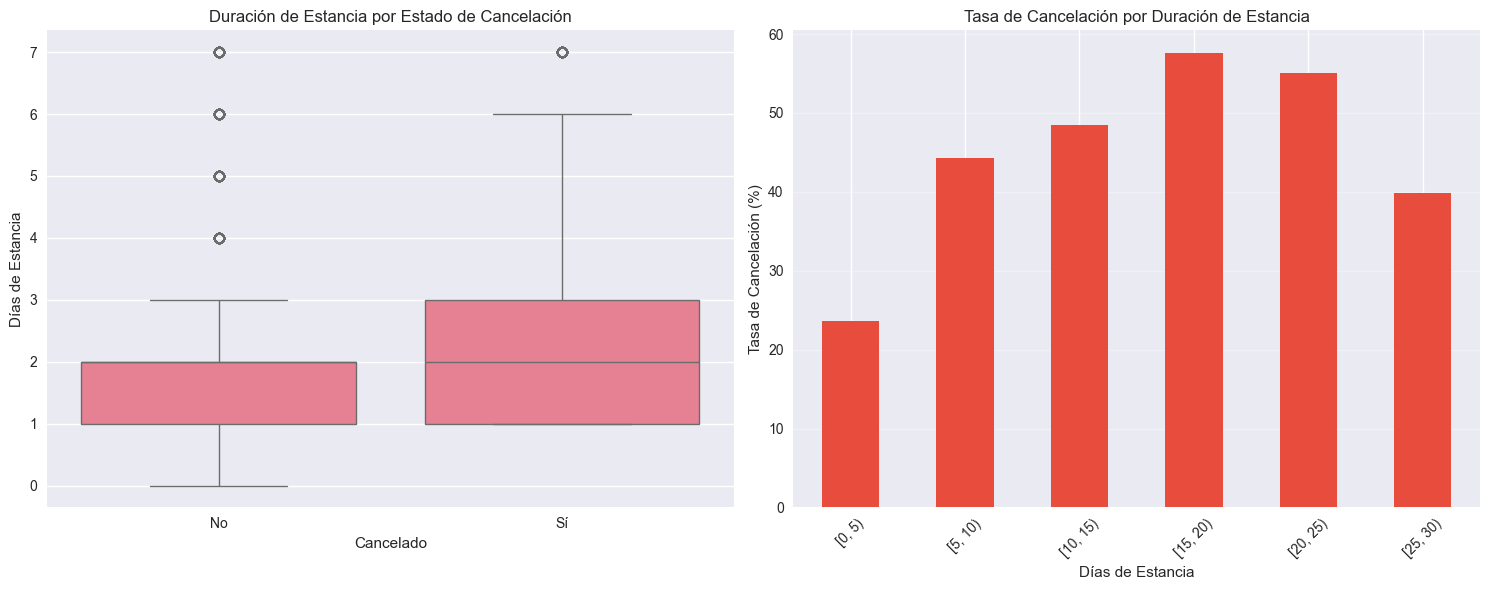

In [12]:
# Gráfico 5: Duración de estancia vs cancelación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Boxplot (limitando outliers)
df_stay = df[df['lenght_of_stay'] <= df['lenght_of_stay'].quantile(0.95)]
sns.boxplot(x='is_cancelled', y='lenght_of_stay', data=df_stay)
plt.title('Duración de Estancia por Estado de Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Días de Estancia')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
# Tasa de cancelación por duración
stay_bins = pd.cut(df['lenght_of_stay'], bins=range(0, 31, 5), right=False)
stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100

stay_cancel_rate.plot(kind='bar', color='#e74c3c')
plt.title('Tasa de Cancelación por Duración de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Tasa de Cancelación (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

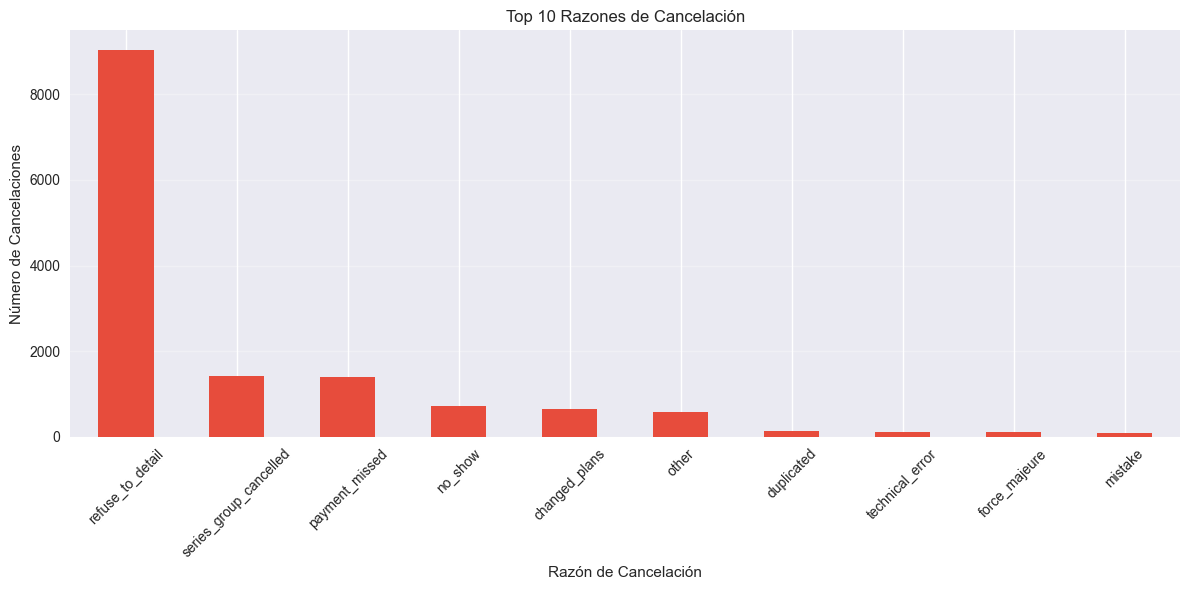

Razón más común: refuse_to_detail (9040 cancelaciones)


In [13]:
# Gráfico 6: Razones de cancelación (solo cancelados)
cancelled_df = df[df['is_cancelled'] == True]

plt.figure(figsize=(12, 6))
reason_counts = cancelled_df['cancellation_reason'].value_counts()

# Si hay muchos valores, mostramos solo los top N
if len(reason_counts) > 10:
    top_reasons = reason_counts.head(10)
    top_reasons.plot(kind='bar', color='#e74c3c')
    plt.title('Top 10 Razones de Cancelación')
else:
    reason_counts.plot(kind='bar', color='#e74c3c')
    plt.title('Razones de Cancelación')

plt.ylabel('Número de Cancelaciones')
plt.xlabel('Razón de Cancelación')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Razón más común: {reason_counts.index[0]} ({reason_counts.iloc[0]} cancelaciones)")

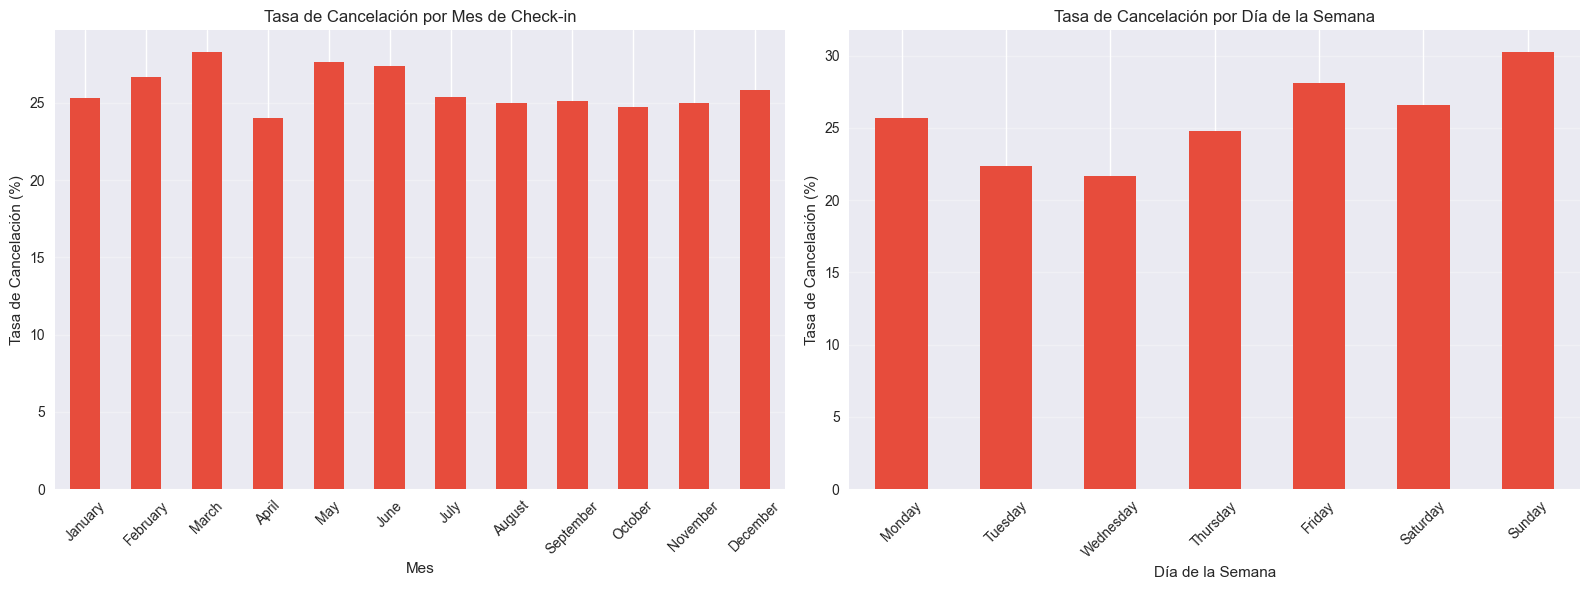

In [14]:
# Gráfico 7: Cancelación por mes y día
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Por mes
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
month_cancel = pd.crosstab(df['checkin_month'], df['is_cancelled'], normalize='index') * 100
month_cancel = month_cancel.reindex([m for m in month_order if m in month_cancel.index])

month_cancel[True].plot(kind='bar', ax=ax1, color='#e74c3c')
ax1.set_title('Tasa de Cancelación por Mes de Check-in')
ax1.set_ylabel('Tasa de Cancelación (%)')
ax1.set_xlabel('Mes')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Por día de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cancel = pd.crosstab(df['checkin_day'], df['is_cancelled'], normalize='index') * 100
day_cancel = day_cancel.reindex([d for d in day_order if d in day_cancel.index])

day_cancel[True].plot(kind='bar', ax=ax2, color='#e74c3c')
ax2.set_title('Tasa de Cancelación por Día de la Semana')
ax2.set_ylabel('Tasa de Cancelación (%)')
ax2.set_xlabel('Día de la Semana')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

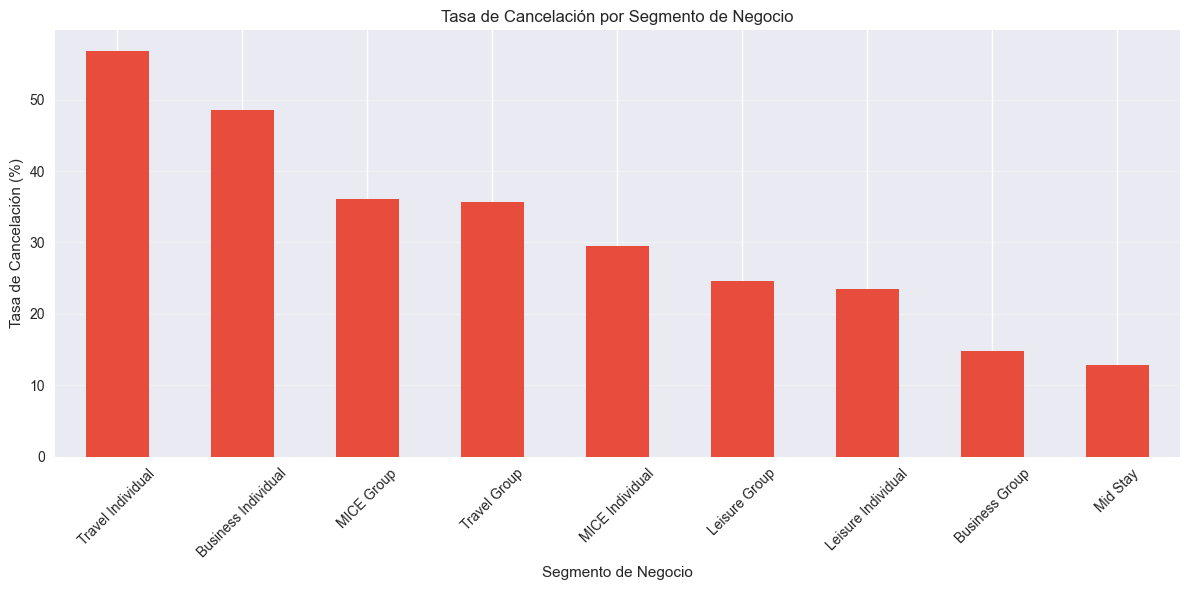

In [15]:
# Gráfico 8: Cancelación por segmento de negocio
plt.figure(figsize=(12, 6))

business_cancel = pd.crosstab(df['business_segment'], df['is_cancelled'], normalize='index') * 100
business_cancel_sorted = business_cancel.sort_values(by=True, ascending=False)

business_cancel_sorted[True].plot(kind='bar', color='#e74c3c')
plt.title('Tasa de Cancelación por Segmento de Negocio')
plt.ylabel('Tasa de Cancelación (%)')
plt.xlabel('Segmento de Negocio')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

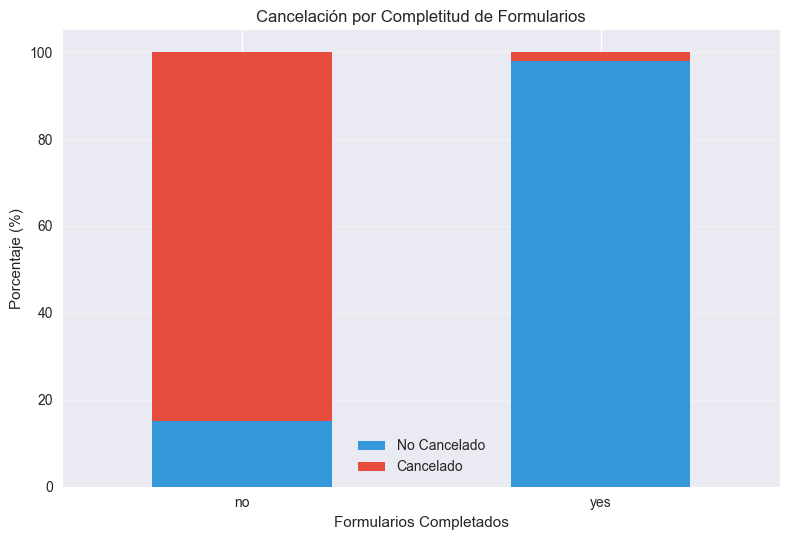

Diferencia en tasa de cancelación (Sí vs No formularios): -82.8%


In [16]:
# Gráfico 9: Formularios completados vs cancelación
plt.figure(figsize=(12, 6))

forms_cancel = pd.crosstab(df['all_entry_forms_completed'], df['is_cancelled'], normalize='index') * 100

forms_cancel.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])
plt.title('Cancelación por Completitud de Formularios')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Formularios Completados')
plt.legend(['No Cancelado', 'Cancelado'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar diferencia
if 'yes' in forms_cancel.index and 'no' in forms_cancel.index:
    diff = forms_cancel.loc['yes', True] - forms_cancel.loc['no', True]
    print(f"Diferencia en tasa de cancelación (Sí vs No formularios): {diff:.1f}%")

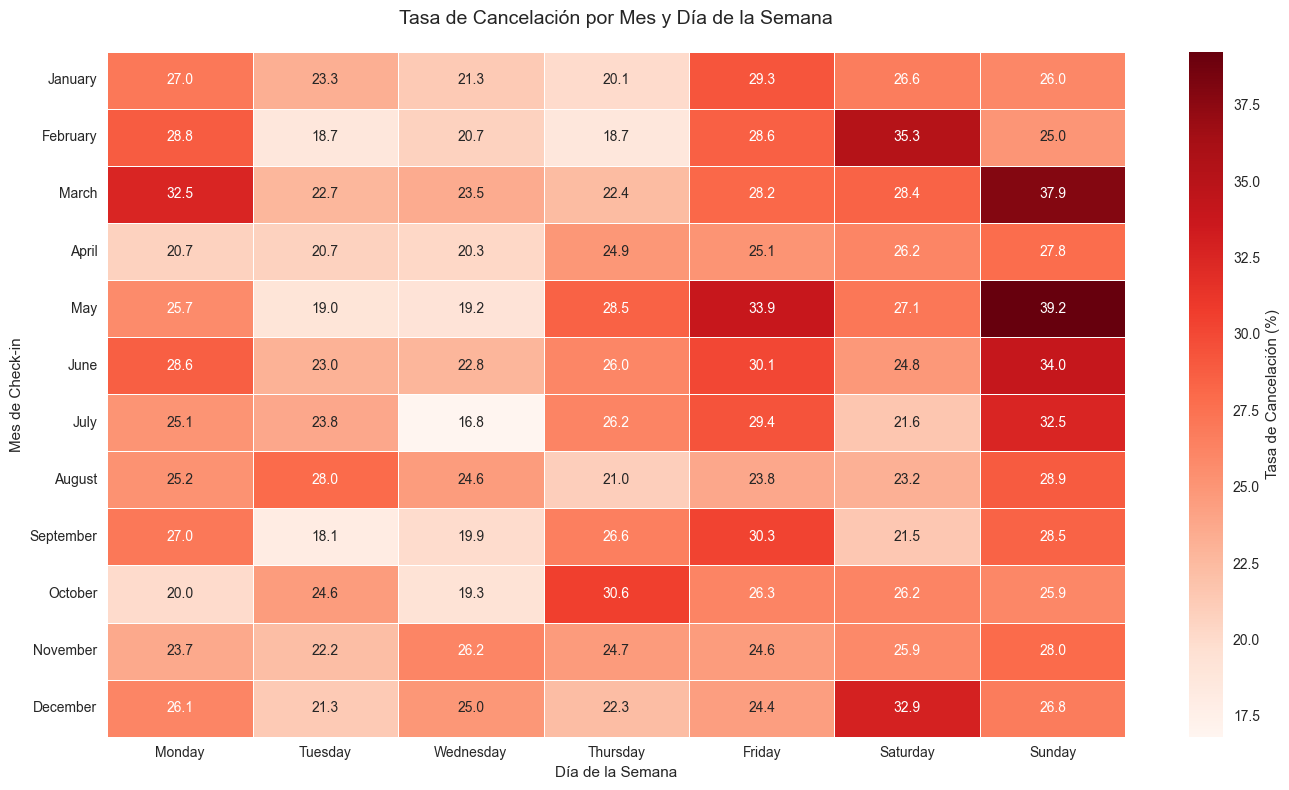

In [17]:
# 10. Heatmap Cancelación por mes y día
plt.figure(figsize=(14, 8))

# Preparar datos para heatmap
heatmap_data = df.groupby(['checkin_month', 'checkin_day'])['is_cancelled'].mean().unstack() * 100

# Ordenar meses y días
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar con los meses/días disponibles
available_months = [m for m in month_order if m in heatmap_data.index]
available_days = [d for d in day_order if d in heatmap_data.columns]

heatmap_data = heatmap_data.reindex(index=available_months, columns=available_days)

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', 
            cbar_kws={'label': 'Tasa de Cancelación (%)'},
            linewidths=0.5)
plt.title('Tasa de Cancelación por Mes y Día de la Semana', fontsize=14, pad=20)
plt.xlabel('Día de la Semana')
plt.ylabel('Mes de Check-in')
plt.tight_layout()
plt.show()

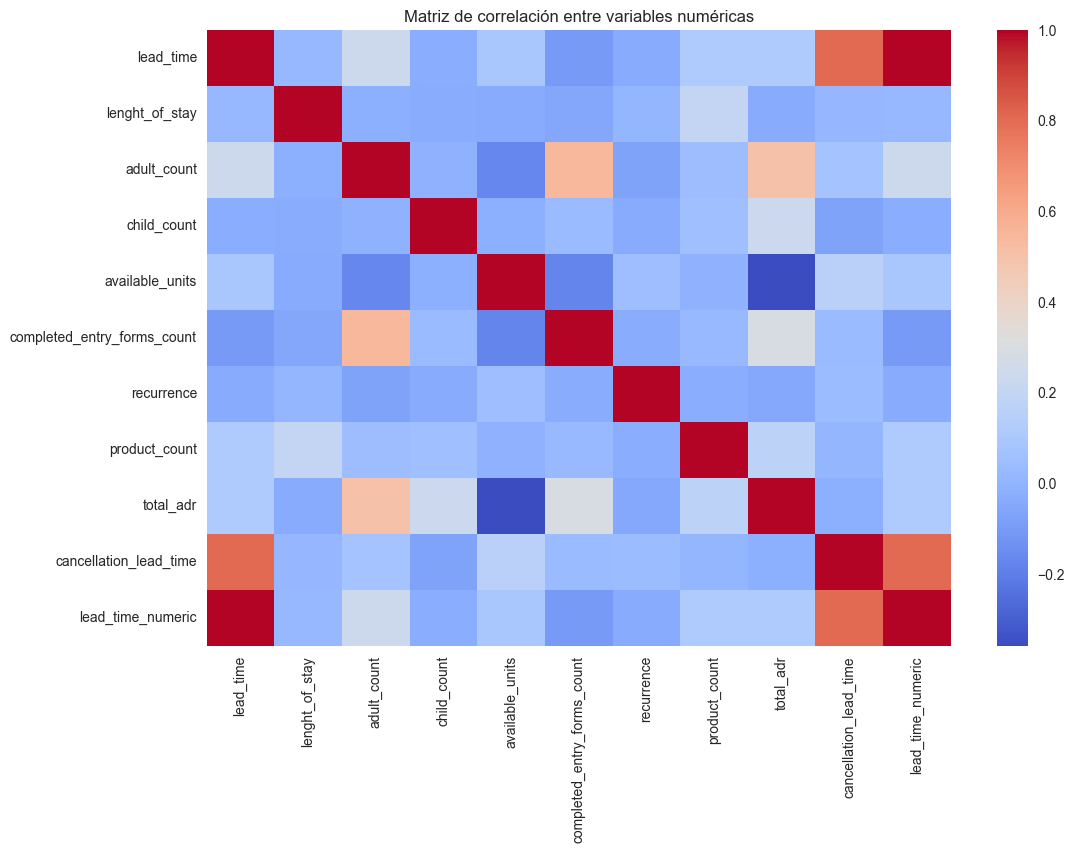

In [18]:
#Matriz de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

## Año Pasado

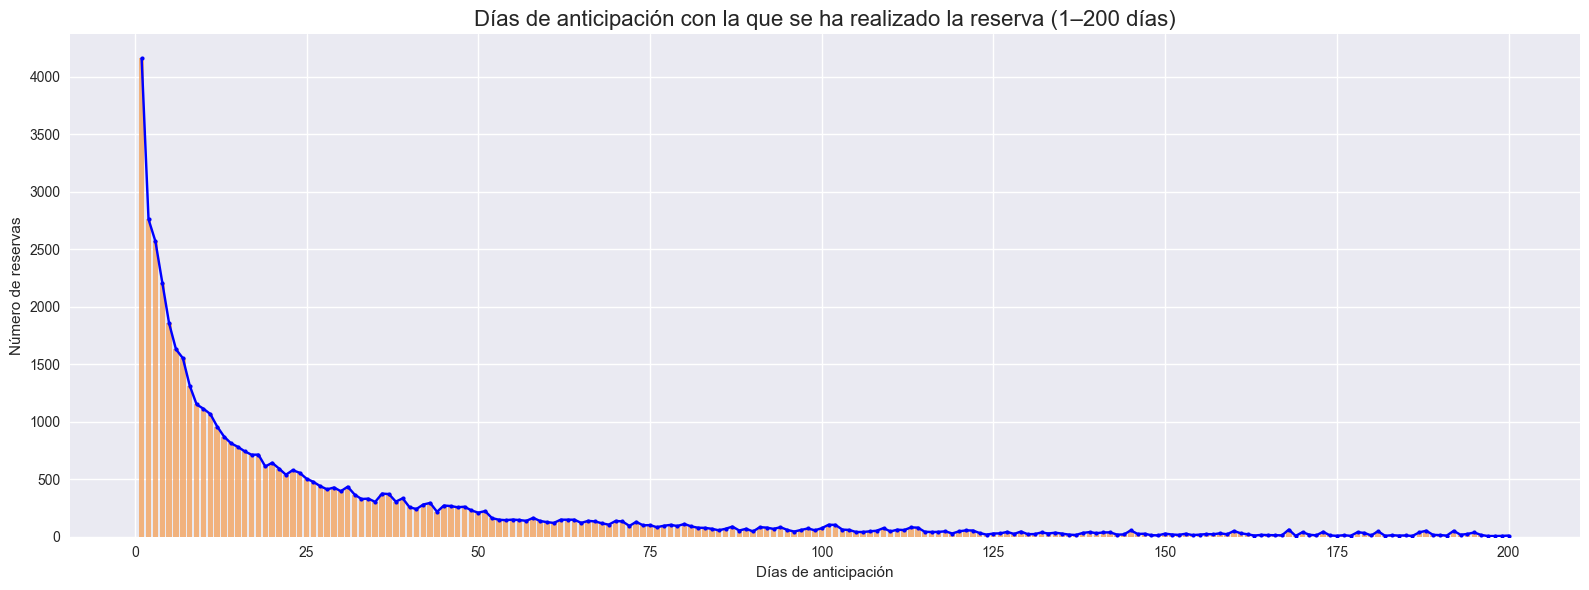

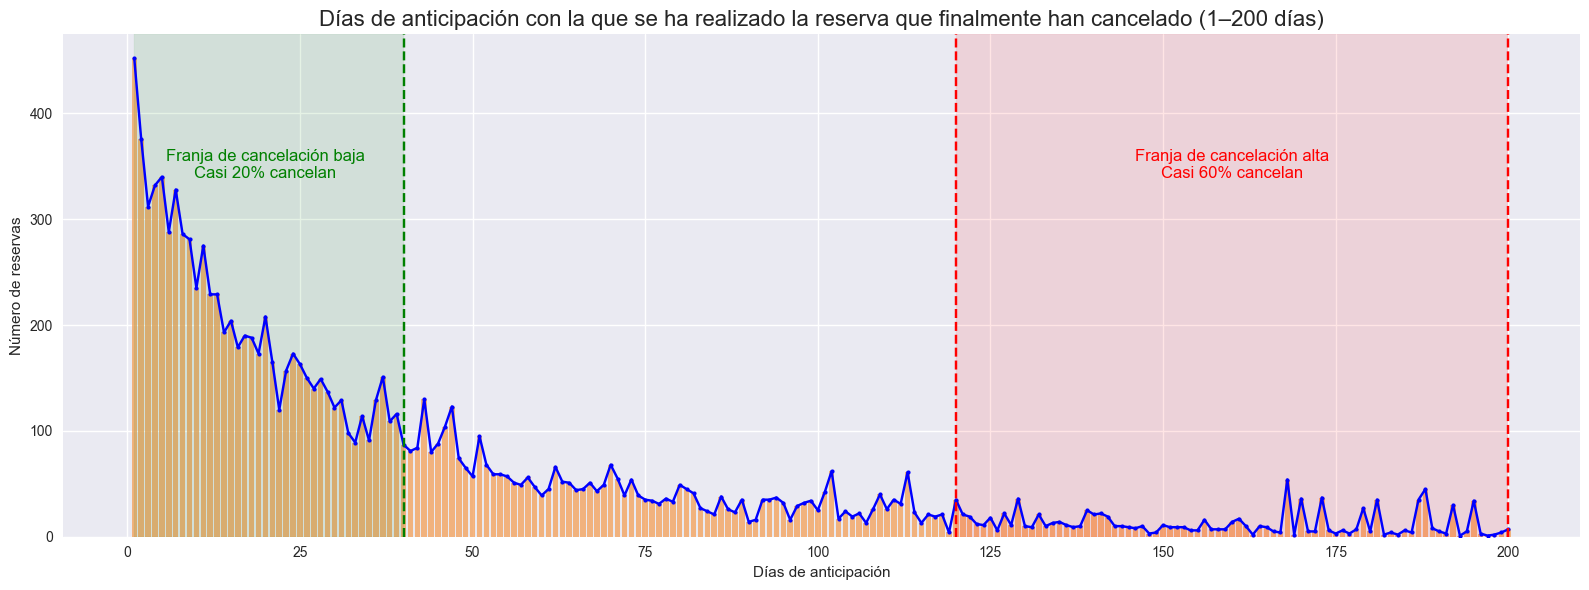

In [19]:
# --- FILTRO: solo de 1 a 200 días ---
df = df[(df["lead_time"] > 0) & (df["lead_time"] <= 200)]

# Asegurar orden ascendente
df = df.sort_values("lead_time")

# Contar reservas por día
reservas = df.groupby("lead_time").size()

# Contar cancelaciones por día
cancelaciones = df[df["is_cancelled"] == 1].groupby("lead_time").size()

# Rellenar días sin valores
cancelaciones = cancelaciones.reindex(reservas.index, fill_value=0)

# ---------------------------------------------------------
# FIGURA 1 — Todas las reservas por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(reservas.index, reservas.values, color="sandybrown", alpha=0.8)
ax.plot(reservas.index, reservas.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# FIGURA 2 — Cancelaciones por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(cancelaciones.index, cancelaciones.values, color="sandybrown", alpha=0.8)
ax.plot(cancelaciones.index, cancelaciones.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva que finalmente han cancelado (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

# --- Franjas de cancelación ---
# Franja alta: 200–120 días
ax.axvspan(200, 120, color="red", alpha=0.1)
ax.axvline(200, color="red", linestyle="--")
ax.axvline(120, color="red", linestyle="--")
ax.text(160, max(cancelaciones)*0.75,
        "Franja de cancelación alta\nCasi 60% cancelan",
        color="red", fontsize=12, ha="center")

# Franja baja: 40–1 días
ax.axvspan(40, 1, color="green", alpha=0.1)
ax.axvline(40, color="green", linestyle="--")
ax.text(20, max(cancelaciones)*0.75,
        "Franja de cancelación baja\nCasi 20% cancelan",
        color="green", fontsize=12, ha="center")

plt.tight_layout()
plt.show()